In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

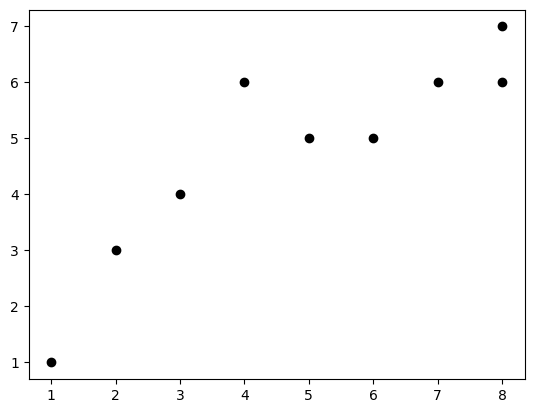

In [2]:
# Split the data into training/testing sets
X_train =np.array([1,2,4,3,5,6,7,8,8])
X_test = np.array([3,9,7,5])
# Split the targets into training/testing sets
y_train = np.array([1,3,6,4,5,5,6,7,6])
y_test = np.array([5,7,5,3])
#Plot the data to see how it looks
plt.scatter(X_train, y_train,  color='black')

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

# Make predictions using the testing set
y_pred = regr.predict(X_test[:, np.newaxis])

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n',regr.intercept_ )
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients: 
 [[0.63865546]]
Intercept: 
 [1.65546218]
Mean squared error: 1.72


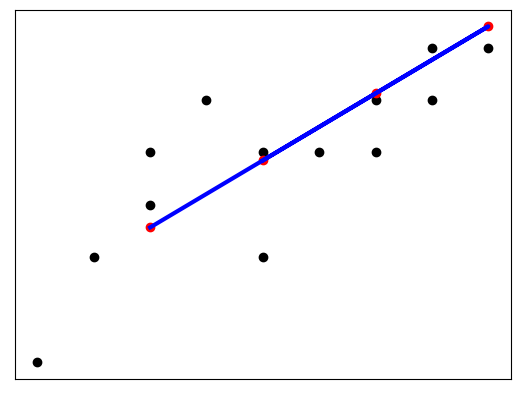

In [4]:
# Plot outputs
allXvalues = np.concatenate((X_train,X_test), axis=0)
allYvalues = np.concatenate((y_train,y_test), axis=0)
plt.scatter(allXvalues, allYvalues,  color='black')
plt.scatter(X_test,y_pred,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
#Decision Tree

In [6]:
#install graphviz for tree visualization
!pip install graphviz

In [7]:
#import required libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
import pandas as pd 
import numpy as np 
import io
import requests

In [8]:
#Read training Dataset 
url="https://raw.githubusercontent.com/dinasayed/mavenFirst/master/mavenFirst/PlayerFittness.csv"
df=pd.read_csv(url)
print(df)

   Practice Abid_Dietary IsMotivated IsFit
0  Moderate          Yes         Yes   Yes
1      good           No         Yes   Yes
2        No           No         Yes    No
3  Moderate           No          No    No
4  Moderate           No         Yes   Yes
5  Moderate           No         Yes   Yes
6        No          Yes          No    No
7      good          Yes          No    No


In [11]:
# Prepare your dataset 
lb = LabelEncoder() 
df['Practice_'] = lb.fit_transform(df['Practice']) 
df['Abid_Dietary_'] = lb.fit_transform(df['Abid_Dietary'] ) 
df['IsMotivated_'] = lb.fit_transform(df['IsMotivated'] )  
df['IsFit_'] = lb.fit_transform(df['IsFit'] ) 
X = df.iloc[:,4:7] 
Y = df.iloc[:,7]

# Prepare a testcase
X_test=[[0 for x in range(3)] for y in range(1)]
X_test[0][0]=2
X_test[0][1]=1
X_test[0][2]=1
#Train a Decision tree
d_tree = DecisionTreeClassifier(criterion='entropy')
d_tree.fit(X.values.astype(int), Y.values.astype(int))
#Test using sample test X_test
y_pred_en = d_tree.predict(X_test)
#The prediction for X-test
print("The prediction result for test case, given features are: practice is moderate, Abid_Dietary is yes and  IsMotivated is yes")
print(y_pred_en)

X_test

The prediction result for test case, given features are: practice is moderate, Abid_Dietary is yes and  IsMotivated is yes
[1]


[[2, 1, 1]]

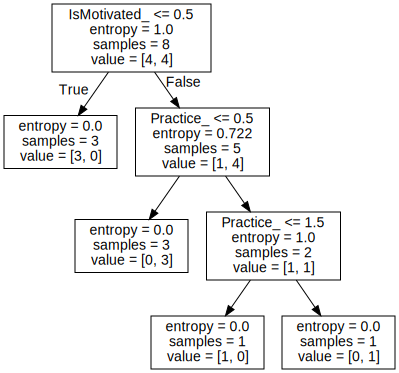

In [10]:
#Visualize the decision tree
graph = Source(export_graphviz(d_tree, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))